In [1]:
 # This is a code cell
import numpy as np

from matplotlib.pyplot import Axes, tight_layout, subplots_adjust, suptitle, plot, subplot, axes, minorticks_on, xlabel, ylabel, legend, title, rc, figure, axvline, axhline, axvline, annotate, text, annotate, xticks 


import matplotlib.pyplot as plt

from scipy.integrate import quad, nquad
from scipy import integrate


from matplotlib import pyplot as plt 


from scipy.fft import fft, fftfreq

from mpl_toolkits import mplot3d
from scipy import fft
from scipy.special import kn

import sympy as sy


In [2]:
N=100

w0=1.32*10**14
wa=0.8*w0
wc=1.75*10**14
gamma0=4.28*10**13


#Normalization

w0_n=1.32*10**14/wa
wc_n=wc/wa
gamma0_n=gamma0/wa

wa_n=1


Omega=0.001 #units of wa

alpha_n=0.1 #units of wa


ome=np.linspace(100,1000,N)

time_n=np.linspace(0,500,N) #units of twa
time2_n=np.linspace(0,500,N) #units of twa

time=np.linspace(0,500,N) #units of twa
time2=np.linspace(0,500,N) #units of twa


ome=np.linspace(100,120,N)
time=np.linspace(500,525,N)
time2=np.linspace(500,525,N)


#wa=wa/wa
#gamma0=2

In [3]:
print(w0_n)
print(wc_n)
print(wa_n)
print(gamma0_n)

1.25
1.6571969696969697
1
0.4053030303030303


In [4]:
def gamma(time,gamma0, alpha):
    return gamma0*(2+np.sin(time*alpha))/2
    

def numerator(omega, time2,time,wa,wc,gamma0,alpha):
    return np.exp(1j*(omega-1)*(time-time2))*omega**4*wc**2*np.sqrt(gamma(time,gamma0,alpha))*np.sqrt(gamma(time2,gamma0,alpha))

def numerator_sin_exp(omega, time2,time,wa,wc,gamma0,alpha):
    return omega**4*wc**2*np.sqrt(gamma(time,gamma0,alpha))*np.sqrt(gamma(time2,gamma0,alpha))

def sum_1(omega,w0,time, gamma0,alpha,wc):
    return np.sqrt((omega**2-w0**2)**2+gamma(time,gamma0,alpha)**2*omega**2+wc**2*(omega**2-w0**2+1j*gamma(time,gamma0,alpha)*omega))

def sum_2(omega,w0,time,gamma0, alpha):
    return np.sqrt((omega**2-w0**2)**2+gamma(time,gamma0,alpha)**2*omega**2)

def integrand(omega,time2,time,wa,wc,gamma0,alpha,w0):
    return numerator(omega,time2,time,wa,wc,gamma0,alpha)/(sum_1(omega,w0,time,gamma0,alpha,wc)*sum_2(omega,w0,time2,gamma0,alpha)+sum_1(omega,w0,time2,gamma0,alpha,wc)*sum_2(omega,w0,time,gamma0,alpha))

def integrand_sin_exp(omega,time2,time,wa,wc,gamma0,alpha,w0):
    return numerator_sin_exp(omega,time2,time,wa,wc,gamma0,alpha)/(sum_1(omega,w0,time,gamma0,alpha,wc)*sum_2(omega,w0,time2,gamma0,alpha)+sum_1(omega,w0,time2,gamma0,alpha,wc)*sum_2(omega,w0,time,gamma0,alpha))

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:465: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagie(func,bound,infbounds,args,full_output,epsabs,epsrel,limit)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:880: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


0


C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:880: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:880: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  quad_r = quad(f, low, high, args=args, full_output=se

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


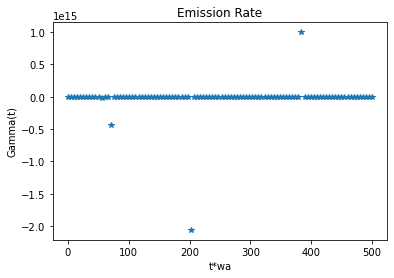

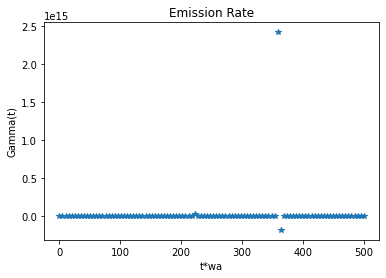

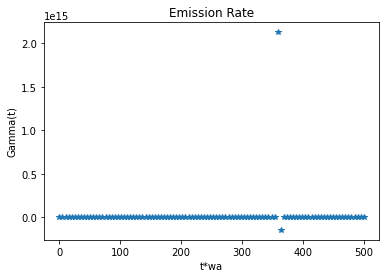

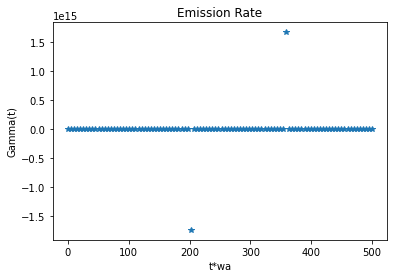

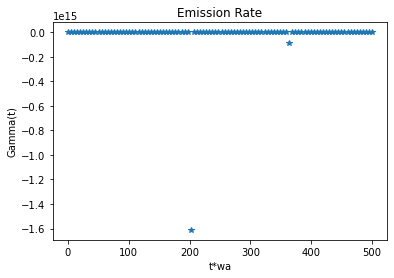

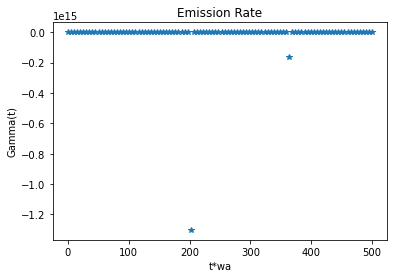

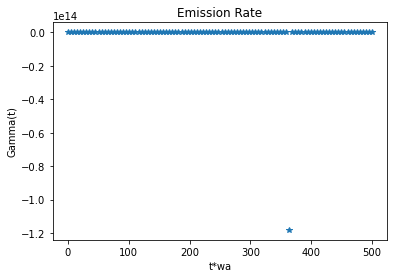

In [6]:
# t' from 0 to t

alpha=0.0
alpha2=0.02
alpha3=0.008
alpha4=0.2

alpha5=1*10**1
alpha6=10**2
alpha7=10**3

# N=100, time=100/100, Omega=0.00, Omega2=0.02 , Omega3=0.008, Omega4=0.2, Omega5=10**1,Omega6=10**2,Omega7=10**3,
testOm_2_1=np.zeros(N)
testOm_2_2=np.zeros(N)
testOm_2_3=np.zeros(N)
testOm_2_4=np.zeros(N)


testOm_2_5=np.zeros(N)
testOm_2_6=np.zeros(N)
testOm_2_7=np.zeros(N)

for i in range(len(time_n)):
    testOm_2_1[i],err=nquad(integrand,[[0,np.inf],[0,time_n[i]]],args=(time_n[i],wa_n,wc_n,gamma0_n,alpha_n,w0_n))
    testOm_2_2[i],err=nquad(integrand,[[0,np.inf],[0,time_n[i]]],args=(time_n[i],wa_n,wc_n,gamma0_n,alpha2,w0_n))
    testOm_2_3[i],err=nquad(integrand,[[0,np.inf],[0,time_n[i]]],args=(time_n[i],wa_n,wc_n,gamma0_n,alpha3,w0_n))
    testOm_2_4[i],err=nquad(integrand,[[0,np.inf],[0,time_n[i]]],args=(time_n[i],wa_n,wc_n,gamma0_n,alpha4,w0_n))
    
    testOm_2_5[i],err=nquad(integrand,[[0,np.inf],[0,time_n[i]]],args=(time_n[i],wa_n,wc_n,gamma0_n,alpha5,w0_n))
    testOm_2_6[i],err=nquad(integrand,[[0,np.inf],[0,time_n[i]]],args=(time_n[i],wa_n,wc_n,gamma0_n,alpha6,w0_n))
    testOm_2_7[i],err=nquad(integrand,[[0,np.inf],[0,time_n[i]]],args=(time_n[i],wa_n,wc_n,gamma0_n,alpha7,w0_n))
    print(i)
    

plt.plot(time_n,testOm_2_1,'*')
plt.ylabel('Gamma(t)')
plt.xlabel('t*wa')
plt.title('Emission Rate')
plt.show()

plt.plot(time_n,testOm_2_2,'*')
plt.ylabel('Gamma(t)')
plt.xlabel('t*wa')
plt.title('Emission Rate')
plt.show()

plt.plot(time_n,testOm_2_3,'*')
plt.ylabel('Gamma(t)')
plt.xlabel('t*wa')
plt.title('Emission Rate')
plt.show()

plt.plot(time_n,testOm_2_4,'*')
plt.ylabel('Gamma(t)')
plt.xlabel('t*wa')
plt.title('Emission Rate')
plt.show()

plt.plot(time_n,testOm_2_5,'*')
plt.ylabel('Gamma(t)')
plt.xlabel('t*wa')
plt.title('Emission Rate')
plt.show()

plt.plot(time_n,testOm_2_6,'*')
plt.ylabel('Gamma(t)')
plt.xlabel('t*wa')
plt.title('Emission Rate')
plt.show()

plt.plot(time_n,testOm_2_7,'*')
plt.ylabel('Gamma(t)')
plt.xlabel('t*wa')
plt.title('Emission Rate')
plt.show()